## Logical Gate
In this notebook we are going to use tensorflow to train our first neural network.

We're going to learn the OR-gate as before and also the AND-gate.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

This can be magic for you. We tell Python to go fetch tensorflow and refer to it as "tf", and some other things.

For the OR-gate, our training data consists of the truth table of OR. We also give names "on" and "off" and the biases.

In [2]:
ON, OFF = 1.0, 0.0
bias = 1.0

training_inputs = [
    [ON, ON, bias],
    [ON, OFF, bias],
    [OFF, ON, bias],
    [OFF, OFF, bias],
]

training_outputs = [
    [ON],
    [ON],
    [ON],
    [OFF],
]

Next we are going to initialize the weights as random numbers.

In [3]:
w = tf.Variable(tf.random_normal([3,1]))

We also need the activation function, which we will define by hand. Note that tensorflow actually contains heaps of activation functions, but we'll just keep it transparent.

In [4]:
def step(x):
    if x >= 0.0:
        return 1.0
    else:
        return 0.0

The output of our model is just the step function of the sum and products of the weights, inputs, and biases.

The error is then the difference between the actual outputs and the correct outputs.

In [5]:
output = tf.nn.sigmoid(tf.matmul(training_inputs, w))

error = tf.subtract(training_outputs, output)
mse = tf.reduce_mean(tf.square(error))

From the gradient we compute the change in the weights that we want to perform in order to improve loss.

In [6]:
delta = tf.matmul(training_inputs, error, transpose_a=True)
train = tf.assign(w, tf.add(w, delta))

Now we start a tensorflow session and let the model train for 20 epochs. We're also going to log error and accuracy.

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_loss_results = []

num_epochs = 51

last_weights = []

for epoch in range(0, num_epochs):
    err, w_ = sess.run([mse, train])
    last_weights = w_
    train_loss_results.append(err)


A quick look at the falling loss.

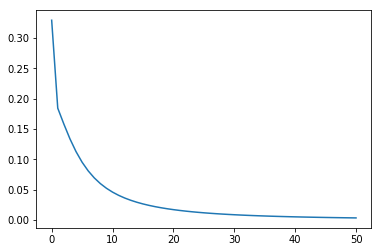

In [8]:
plt.plot(train_loss_results)

And to check we look at the predicted outcomes:

In [9]:
scipy.special.expit(np.matmul(training_inputs, last_weights))

array([[0.99981425],
       [0.96133263],
       [0.95989344],
       [0.09954287]])

And now you for the AND-gate!